# Walmart Dataset - Regression Practise Problem

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sk

In [4]:
df = pd.read_csv('walmart_mba.csv')

In [5]:
df.head()

,Store,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Weekly_Sales
0,26.0,8/26/11,False,61.10,3.796,136.213613,7.767,152513.0,593115.51
1,34.0,3/25/11,False,53.11,3.480,128.616064,10.398,158114.0,519134.07
2,21.0,12/3/10,False,50.43,2.708,211.265543,8.163,140167.0,612096.28
3,8.0,9/17/10,False,75.32,2.582,214.878556,6.315,155078.0,517038.77
4,19.0,5/18/12,False,58.81,4.029,138.106581,8.150,203819.0,668089.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
Store           6433 non-null float64
Date            6435 non-null object
IsHoliday       6434 non-null object
Temperature     6434 non-null float64
Fuel_Price      6434 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
Size            6434 non-null float64
Weekly_Sales    6435 non-null float64
dtypes: float64(7), object(2)
memory usage: 452.5+ KB


In [5]:
df.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Weekly_Sales
count,6433.000000,6434.000000,6434.000000,6435.000000,6435.000000,6434.000000,6.435000e+03
mean,23.003575,60.660788,3.358657,171.578394,7.999151,130275.853746,7.015595e+05
std,12.987945,18.444802,0.459037,39.356712,1.875885,63114.893569,3.915942e+05
min,1.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,6.898211e+04
25%,12.000000,47.445000,2.933000,131.735000,6.891000,70713.000000,3.756139e+05
50%,23.000000,62.665000,3.446500,182.616521,7.874000,126512.000000,6.396524e+05
75%,34.000000,74.930000,3.735000,212.743293,8.622000,202307.000000,9.588074e+05
max,45.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,2.773216e+06


In [6]:
df.isnull().sum().sort_values(ascending = False)

Store           2
Size            1
Fuel_Price      1
Temperature     1
IsHoliday       1
Weekly_Sales    0
Unemployment    0
CPI             0
Date            0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum().sort_values(ascending = False)

Weekly_Sales    0
Size            0
Unemployment    0
CPI             0
Fuel_Price      0
Temperature     0
IsHoliday       0
Date            0
Store           0
dtype: int64

In [10]:
df.shape

(6430, 9)

In [11]:
df.columns

Index(['Store', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Size', 'Weekly_Sales'],
      dtype='object')

In [12]:
df.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Weekly_Sales
count,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6430.000000,6.430000e+03
mean,23.001244,60.671899,3.358847,171.598810,7.999693,130280.768429,7.013809e+05
std,12.985161,18.435012,0.459015,39.354835,1.876281,63100.696362,3.912980e+05
min,1.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,6.898211e+04
25%,12.000000,47.510000,2.933000,131.735000,6.891000,70713.000000,3.756083e+05
50%,23.000000,62.675000,3.450000,182.622509,7.874000,126512.000000,6.396246e+05
75%,34.000000,74.930000,3.735000,212.750341,8.622000,202307.000000,9.585073e+05
max,45.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,2.773216e+06


In [101]:
#sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='rainbow')

# Visualizations

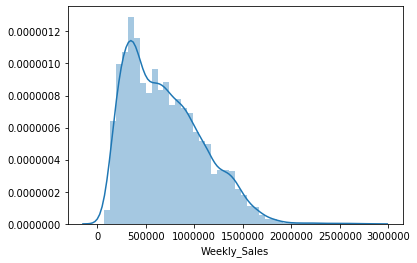

In [102]:
sns.distplot(df['Weekly_Sales'])

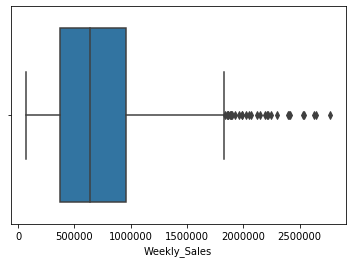

In [103]:
sns.boxplot(df['Weekly_Sales'])

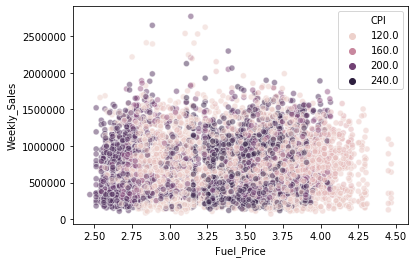

In [107]:
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales', data = df, hue = 'CPI', alpha = 0.5 )

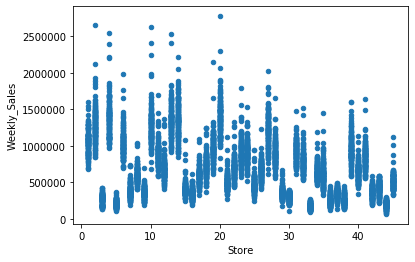

In [15]:
df.plot.scatter(x='Store', y='Weekly_Sales')
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales', data = df, hue = 'CPI', alpha = 0.5 )

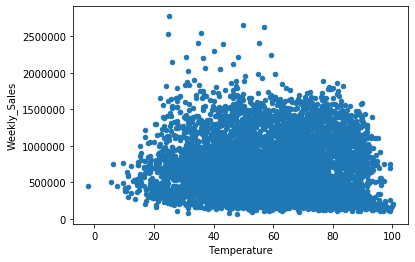

In [16]:
df.plot.scatter(x = 'Temperature', y='Weekly_Sales')

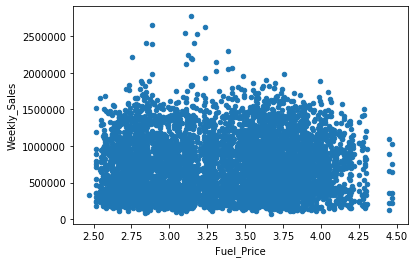

In [17]:
df.plot.scatter(x = 'Fuel_Price', y='Weekly_Sales')

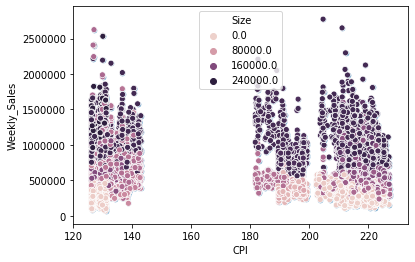

In [15]:
df.plot.scatter(x = 'CPI', y='Weekly_Sales')
sns.scatterplot(data = df ,x = 'CPI', y='Weekly_Sales', hue = 'Size' )

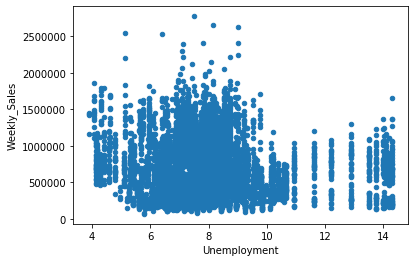

In [19]:
df.plot.scatter(x = 'Unemployment', y='Weekly_Sales')

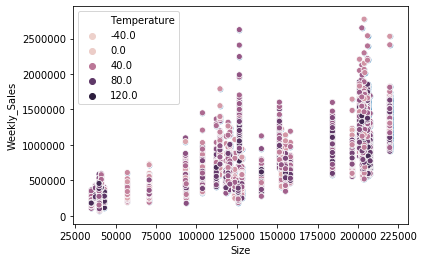

In [16]:
df.plot.scatter(x = 'Size', y='Weekly_Sales')
sns.scatterplot(data = df, x = 'Size', y='Weekly_Sales', hue = 'Temperature')

In [21]:
df.corr()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Weekly_Sales
Store,1.000000,-0.022603,0.060599,-0.210122,0.223183,-0.243396,-0.322320
Temperature,-0.022603,1.000000,0.144878,0.176330,0.101275,-0.092328,-0.056080
Fuel_Price,0.060599,0.144878,1.000000,-0.170888,-0.034669,0.008454,0.013298
CPI,-0.210122,0.176330,-0.170888,1.000000,-0.302598,-0.009202,-0.073006
Unemployment,0.223183,0.101275,-0.034669,-0.302598,1.000000,-0.088771,-0.094411
Size,-0.243396,-0.092328,0.008454,-0.009202,-0.088771,1.000000,0.781825
Weekly_Sales,-0.322320,-0.056080,0.013298,-0.073006,-0.094411,0.781825,1.000000


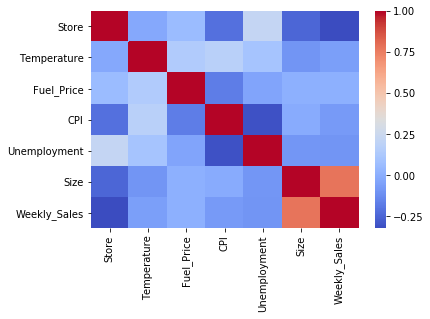

In [22]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

# Define Features and Target Variable

In [17]:
X = df[ ['IsHoliday', 'Temperature', 'Fuel_Price','CPI',
       'Unemployment', 'Size' ]]
X.shape

(6430, 6)

In [18]:
y = df[ 'Weekly_Sales']


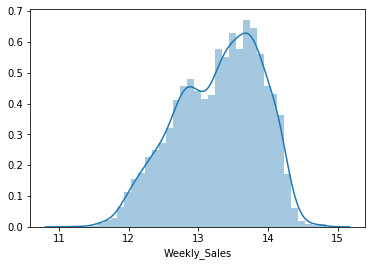

In [19]:
log_y = np.log(y)

sns.distplot(log_y)

In [20]:
X= pd.get_dummies(data=X, drop_first = True)
X.shape

(6430, 6)

# Baseline Model

In [21]:
df['Weekly_Sales'].mean()

701380.9382472784

In [44]:
baseline = np.empty(len(X))
baseline.fill(df['Weekly_Sales'].mean())
baseline

array([701380.93824728, 701380.93824728, 701380.93824728, ...,
       701380.93824728, 701380.93824728, 701380.93824728])

In [45]:
#Calculate Performance Metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(df['Weekly_Sales'], baseline))
print('MSE:', metrics.mean_squared_error(df['Weekly_Sales'], baseline))
print('RMSE:',np.sqrt(metrics.mean_squared_error(df['Weekly_Sales'], baseline)) )

MAE: 321367.6311906818
MSE: 153090334328.8353
RMSE: 391267.59938542737


# Linear Regression

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=101)

In [63]:
X_train.shape

(3858, 6)

In [49]:
y_train.shape

(3858,)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()


In [52]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

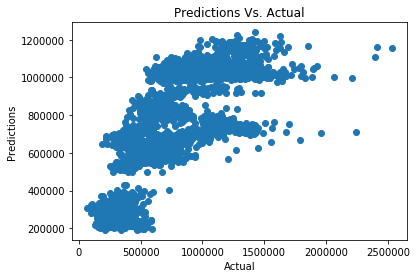

In [54]:
plt.scatter(y_test, predictions)
plt.title('Predictions Vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predictions')

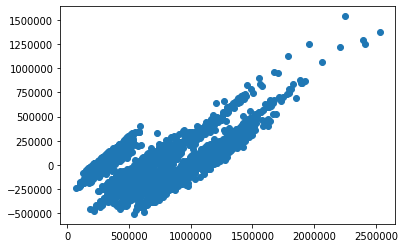

In [55]:
# Check Homoscedasticity (equal variance)
residuals = y_test-predictions
plt.scatter(y_test, y_test-predictions)

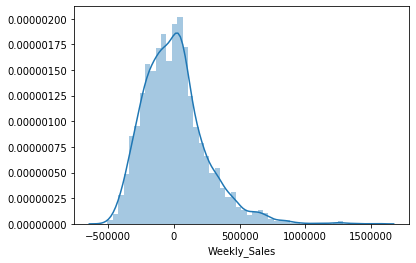

In [56]:
# Check Residuals Distribution for normality
sns.distplot(residuals)

In [57]:
print(lm.intercept_)

340491.9225639395


In [58]:
coeff_df = pd.DataFrame(lm.coef_ , X.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
Temperature,924.350282
Fuel_Price,-20995.196262
CPI,-938.623948
Unemployment,-12580.962129
Size,4.845795
IsHoliday_True,53293.275805


In [59]:
from sklearn import metrics

In [60]:
print('R_Squared:', metrics.r2_score(y_test,predictions) )
print('MAE:', metrics.mean_absolute_error(y_test,predictions) )
print('MSE:', metrics.mean_squared_error(y_test,predictions) )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


R_Squared: 0.6147901764652737
MAE: 181182.56250403513
MSE: 57805993587.51883
RMSE: 240428.7702990614


# Linear Regression with Cross-Validation

In [64]:
from sklearn.model_selection import cross_val_predict

In [65]:
predicted = cross_val_predict(lm, X, y, cv=10)
predicted

array([834592.16910724, 832527.76485059, 704311.99462485, ...,
       878170.50938418, 283006.62895543, 338955.40671994])

In [66]:
#Calculate Performance Metrics
from sklearn import metrics
#print('R_Squared:', metrics.r2_score(y_test,predicted) )
print('MAE:', metrics.mean_absolute_error(y, predicted))
print('MSE:', metrics.mean_squared_error(y, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predicted)))

MAE: 180259.94207630426
MSE: 58196218250.10656
RMSE: 241238.923580144


# Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression

In [56]:
#Instantiate regressor
regr = RandomForestRegressor(n_estimators=100) #max_depth= None, 
                            # min_samples_split = 2, 
                            # min_samples_leaf = 1,
                            # max_features = "auto",n_jobs = -1, #n_jobs:use all processors
                            # random_state =0)

In [57]:
#Fit training data
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
# Predict on new data
salesPredictions = regr.predict(X_test)

In [59]:
#Calculate Performance Metrics
from sklearn import metrics
print('R_Squared:', metrics.r2_score(y_test,salesPredictions) )
print('MAE:', metrics.mean_absolute_error(y_test, salesPredictions))
print('MSE:', metrics.mean_squared_error(y_test, salesPredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, salesPredictions)))

R_Squared: 0.8485669417012449
MAE: 102548.93597846034
MSE: 22724598029.798325
RMSE: 150746.80105991743


# KNN

In [60]:
# Apply Standard Scaler to features dataset ->SCALING MIGHT BE UNIMPORTANT
import sklearn.preprocessing as preproc
X_scaled = preproc.StandardScaler().fit_transform(X)
X_scaled

array([[ 0.23095509,  0.02322398,  0.9524467 , ..., -0.12402813,
         0.35235682, -0.27366282],
       [ 0.84709087, -0.41022414,  0.2639618 , ...,  1.27832328,
         0.44112661, -0.27366282],
       [-0.15412977, -0.555611  , -1.41803298, ...,  0.08704414,
         0.15668607, -0.27366282],
       ...,
       [ 1.3091927 , -0.94240514, -1.03239428, ..., -1.36700931,
         0.39308854, -0.27366282],
       [ 0.7700739 , -0.7037103 ,  0.62127675, ...,  0.00549349,
        -1.43576567, -0.27366282],
       [ 1.46322665,  1.58016531,  0.79339797, ..., -0.44223558,
        -1.43576567, -0.27366282]])

In [61]:
# Apply Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=13)

In [62]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsRegressor

In [63]:
# Instantiate KNN Regressor with K Neighbors
knn = KNeighborsRegressor(n_neighbors=8)

In [64]:
# Fit KNN model
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [65]:
#Make predictions on test data
salesPredictions = knn.predict(X_test)

In [66]:

#Calculate Performance Metrics
from sklearn import metrics
print('R_Squared:', metrics.r2_score(y_test,salesPredictions) )
print('MAE:', metrics.mean_absolute_error(y_test, salesPredictions))
print('MSE:', metrics.mean_squared_error(y_test, salesPredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, salesPredictions)))

R_Squared: 0.8211598493331009
MAE: 111129.54724533437
MSE: 27606695892.241646
RMSE: 166152.6283037426


# K Means Clustering

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6430 entries, 0 to 6434
Data columns (total 9 columns):
Store           6430 non-null float64
Date            6430 non-null object
IsHoliday       6430 non-null object
Temperature     6430 non-null float64
Fuel_Price      6430 non-null float64
CPI             6430 non-null float64
Unemployment    6430 non-null float64
Size            6430 non-null float64
Weekly_Sales    6430 non-null float64
dtypes: float64(7), object(2)
memory usage: 502.3+ KB


In [74]:
df = df[['Store','Temperature','Fuel_Price','CPI','Unemployment','Size','Weekly_Sales']]

In [75]:
from sklearn.cluster import KMeans

In [76]:
km = KMeans(n_clusters = 3)

In [83]:
km.fit_predict(df)


array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

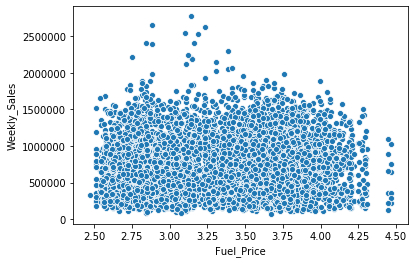

In [89]:
#df.plot.scatter(x='Fuel_Price',y='Weekly_Sales', label = 'ypred')
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales', data = df )

## Linear Regression with Keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [23]:
model = Sequential()

In [24]:
model.add(Dense(1, input_shape=(6,))) 
# add dense layer to model
# first parameter is no. of output
#input_shape -> number of  inputs

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(Adam(lr=0.8), 'mean_squared_error') 
#compiles model using backend in this case tensorflow

In [30]:
model.fit(X_train, y_train, epochs = 20)


Epoch 1/20
3858/3858 [==============================] - 0s 62us/step - loss: 88464024953.4308
Epoch 2/20
3858/3858 [==============================] - 0s 39us/step - loss: 61466643804.7652
Epoch 3/20
3858/3858 [==============================] - 0s 47us/step - loss: 61152208754.7952
Epoch 4/20
3858/3858 [==============================] - 0s 70us/step - loss: 61627972301.7024
Epoch 5/20
3858/3858 [==============================] - 0s 74us/step - loss: 61422834895.5604
Epoch 6/20
3858/3858 [==============================] - 0s 69us/step - loss: 63134683603.1436
Epoch 7/20
3858/3858 [==============================] - 0s 67us/step - loss: 62660796717.5200
Epoch 8/20
3858/3858 [==============================] - 0s 62us/step - loss: 63423388545.1280
Epoch 9/20
3858/3858 [==============================] - 0s 51us/step - loss: 61603764842.9653
Epoch 10/20
3858/3858 [==============================] - 0s 38us/step - loss: 61933823684.6781
Epoch 11/20
3858/3858 [==============================] - 0

## Evaluating Model Performance

In [31]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [32]:
from sklearn.metrics import mean_squared_error as mse

In [34]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))
print("The RMSE on the Test set is:\t{:0.1f}".format(  np.sqrt(mse(y_test, y_test_pred))))


The Mean Squared Error on the Train set is:	80538232694.9
The Mean Squared Error on the Test set is:	79315315882.9
The RMSE on the Test set is:	281629.7
